In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # Display all columns in a pandas dataframe
import matplotlib.pyplot as plt

from itertools import zip_longest

cwd = Path(os.getcwd())
print(os.listdir("/"))

['bin', 'boot', 'dev', 'etc', 'home', 'lib', 'lib64', 'media', 'mnt', 'opt', 'proc', 'root', 'run', 'sbin', 'srv', 'sys', 'tmp', 'usr', 'var', 'get-docker.sh', 'dxdata-0.36.1-py2.py3-none-any.whl', 'install_r_kernel.R', 'install_r_packages.R', '.dockerenv']


In [2]:
print(os.listdir("/mnt/project/data"))

['anamnesis.csv', 'cohorts', 'densitometry_participant.csv', 'icd10-codes_participant.csv', 'processed']


In [3]:
FX_TYPES = ["vertebral", "hip", "wrist", "any"]

In [4]:
data = pd.read_csv("/mnt/project/data/icd10-codes_participant.csv", parse_dates=["p53_i2", "p53_i3"])
data.rename(columns={
    "eid": "patientId", 
    "p53_i2": "date_i2", 
    "p53_i3": "date_i3",
    "p21003_i2": "age_i2"
}, inplace=True)
data = data.sort_values(by=["patientId", "date_i2"])
data

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,patientId,date_i2,date_i3,p2724_i2,p2724_i1,p2724_i0,age_i2,p41270,p131962,p41280_a0,p41280_a1,p41280_a2,p41280_a3,p41280_a4,p41280_a5,p41280_a6,p41280_a7,p41280_a8,p41280_a9,p41280_a10,p41280_a11,p41280_a12,p41280_a13,p41280_a14,p41280_a15,p41280_a16,p41280_a17,p41280_a18,p41280_a19,p41280_a20,p41280_a21,p41280_a22,p41280_a23,p41280_a24,p41280_a25,p41280_a26,p41280_a27,p41280_a28,p41280_a29,p41280_a30,p41280_a31,p41280_a32,p41280_a33,p41280_a34,p41280_a35,p41280_a36,p41280_a37,p41280_a38,p41280_a39,p41280_a40,p41280_a41,p41280_a42,p41280_a43,p41280_a44,p41280_a45,p41280_a46,p41280_a47,p41280_a48,p41280_a49,p41280_a50,p41280_a51,p41280_a52,p41280_a53,p41280_a54,p41280_a55,p41280_a56,p41280_a57,p41280_a58,p41280_a59,p41280_a60,p41280_a61,p41280_a62,p41280_a63,p41280_a64,p41280_a65,p41280_a66,p41280_a67,p41280_a68,p41280_a69,p41280_a70,p41280_a71,p41280_a72,p41280_a73,p41280_a74,p41280_a75,p41280_a76,p41280_a77,p41280_a78,p41280_a79,p41280_a80,p41280_a81,p41280_a82,p41280_a83,p41280_a84,p41280_a85,p41280_a86,p41280_a87,p41280_a88,p41280_a89,p41280_a90,p41280_a91,p41280_a92,p41280_a93,p41280_a94,p41280_a95,p41280_a96,p41280_a97,p41280_a98,p41280_a99,p41280_a100,p41280_a101,p41280_a102,p41280_a103,p41280_a104,p41280_a105,p41280_a106,p41280_a107,p41280_a108,p41280_a109,p41280_a110,p41280_a111,p41280_a112,p41280_a113,p41280_a114,p41280_a115,p41280_a116,p41280_a117,p41280_a118,p41280_a119,p41280_a120
11190,1000031,2021-10-21,NaT,Yes,NaN,Yes,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11191,1000344,2015-02-23,NaT,Yes,Not sure - other reason,No,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000621,2014-10-30,NaT,Not sure - had a hysterectomy,Not sure - had a hysterectomy,Not sure - had a hysterectomy,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5682,1000898,2018-11-07,NaT,Yes,Yes,No,59,Z30.2 Sterilisation,NaN,2000-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16766,1000946,2018-02-12,NaT,Yes,NaN,Yes,67,"R07.4 Chest pain, unspecified",NaN,2000-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
def find_menopause_status(row):
    if row["p2724_i0"] == "Yes" or\
    row["p2724_i1"] == "Yes" or\
    row["p2724_i2"] == "Yes":
        return True
    else:
        return False

In [6]:
# Forward fill menopause status and store value in a new column
menopausal_variables = ["p2724_i0", "p2724_i1", "p2724_i2"]
data["postmenopausal"] = data[menopausal_variables].apply(lambda x: find_menopause_status(x), axis=1)

# Drop old columns
data.drop(menopausal_variables, axis=1, inplace=True)
data.drop(["p41280_a119", "p41280_a120"], axis=1, inplace=True) # these columns are all NaN

# Filter for menopausal women and drop columns
pm_women = data[data["postmenopausal"] == True].reset_index(drop=True)
pm_women

,patientId,date_i2,date_i3,age_i2,p41270,p131962,p41280_a0,p41280_a1,p41280_a2,p41280_a3,p41280_a4,p41280_a5,p41280_a6,p41280_a7,p41280_a8,p41280_a9,p41280_a10,p41280_a11,p41280_a12,p41280_a13,p41280_a14,p41280_a15,p41280_a16,p41280_a17,p41280_a18,p41280_a19,p41280_a20,p41280_a21,p41280_a22,p41280_a23,p41280_a24,p41280_a25,p41280_a26,p41280_a27,p41280_a28,p41280_a29,p41280_a30,p41280_a31,p41280_a32,p41280_a33,p41280_a34,p41280_a35,p41280_a36,p41280_a37,p41280_a38,p41280_a39,p41280_a40,p41280_a41,p41280_a42,p41280_a43,p41280_a44,p41280_a45,p41280_a46,p41280_a47,p41280_a48,p41280_a49,p41280_a50,p41280_a51,p41280_a52,p41280_a53,p41280_a54,p41280_a55,p41280_a56,p41280_a57,p41280_a58,p41280_a59,p41280_a60,p41280_a61,p41280_a62,p41280_a63,p41280_a64,p41280_a65,p41280_a66,p41280_a67,p41280_a68,p41280_a69,p41280_a70,p41280_a71,p41280_a72,p41280_a73,p41280_a74,p41280_a75,p41280_a76,p41280_a77,p41280_a78,p41280_a79,p41280_a80,p41280_a81,p41280_a82,p41280_a83,p41280_a84,p41280_a85,p41280_a86,p41280_a87,p41280_a88,p41280_a89,p41280_a90,p41280_a91,p41280_a92,p41280_a93,p41280_a94,p41280_a95,p41280_a96,p41280_a97,p41280_a98,p41280_a99,p41280_a100,p41280_a101,p41280_a102,p41280_a103,p41280_a104,p41280_a105,p41280_a106,p41280_a107,p41280_a108,p41280_a109,p41280_a110,p41280_a111,p41280_a112,p41280_a113,p41280_a114,p41280_a115,p41280_a116,p41280_a117,p41280_a118,postmenopausal
0,1000031,2021-10-21,NaT,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1000344,2015-02-23,NaT,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,1000898,2018-11-07,NaT,59,Z30.2 Sterilisation,NaN,2000-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,1000946,2018-02-12,NaT,67,"R07.4 Chest pain, unspecified",NaN,2000-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,1001273,2019-09-14,NaT,54,"H26.0 Infantile, juvenile and presenile catara...",NaN,2007-01-10,2006-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
def parse_icd_codes(codes, length=False, max_codes=1):
    try:
        if length:
            return len(codes.split("|"))
        else:
            code_list = [code.split()[0] for code in codes.split("|")]
            return code_list + [np.nan]*(max_codes - len(code_list))
    except AttributeError:
        if length:
            return None
        else:
            return [np.nan]*max_codes

In [8]:
# Find the maximum number of ICD-10 codes a patient in our dataset has
max_codes = int(pm_women["p41270"].apply(lambda x: parse_icd_codes(x, length=True)).max())
print("Maximum ICD-10 codes:", max_codes)

Maximum ICD-10 codes: 119


In [9]:
pm_women_expanded = pm_women.join(pd.DataFrame(pm_women["p41270"].apply(lambda x: parse_icd_codes(x, max_codes=max_codes)).to_list()).add_prefix("p41270_a"))
pm_women_expanded

,patientId,date_i2,date_i3,age_i2,p41270,p131962,p41280_a0,p41280_a1,p41280_a2,p41280_a3,p41280_a4,p41280_a5,p41280_a6,p41280_a7,p41280_a8,p41280_a9,p41280_a10,p41280_a11,p41280_a12,p41280_a13,p41280_a14,p41280_a15,p41280_a16,p41280_a17,p41280_a18,p41280_a19,p41280_a20,p41280_a21,p41280_a22,p41280_a23,p41280_a24,p41280_a25,p41280_a26,p41280_a27,p41280_a28,p41280_a29,p41280_a30,p41280_a31,p41280_a32,p41280_a33,p41280_a34,p41280_a35,p41280_a36,p41280_a37,p41280_a38,p41280_a39,p41280_a40,p41280_a41,p41280_a42,p41280_a43,p41280_a44,p41280_a45,p41280_a46,p41280_a47,p41280_a48,p41280_a49,p41280_a50,p41280_a51,p41280_a52,p41280_a53,p41280_a54,p41280_a55,p41280_a56,p41280_a57,p41280_a58,p41280_a59,p41280_a60,p41280_a61,p41280_a62,p41280_a63,p41280_a64,p41280_a65,p41280_a66,p41280_a67,p41280_a68,p41280_a69,p41280_a70,p41280_a71,p41280_a72,p41280_a73,p41280_a74,p41280_a75,p41280_a76,p41280_a77,p41280_a78,p41280_a79,p41280_a80,p41280_a81,p41280_a82,p41280_a83,p41280_a84,p41280_a85,p41280_a86,p41280_a87,p41280_a88,p41280_a89,p41280_a90,p41280_a91,p41280_a92,p41280_a93,p41280_a94,p41280_a95,p41280_a96,p41280_a97,p41280_a98,p41280_a99,p41280_a100,p41280_a101,p41280_a102,p41280_a103,p41280_a104,p41280_a105,p41280_a106,p41280_a107,p41280_a108,p41280_a109,p41280_a110,p41280_a111,p41280_a112,p41280_a113,p41280_a114,p41280_a115,p41280_a116,p41280_a117,p41280_a118,postmenopausal,p41270_a0,p41270_a1,p41270_a2,p41270_a3,p41270_a4,p41270_a5,p41270_a6,p41270_a7,p41270_a8,p41270_a9,p41270_a10,p41270_a11,p41270_a12,p41270_a13,p41270_a14,p41270_a15,p41270_a16,p41270_a17,p41270_a18,p41270_a19,p41270_a20,p41270_a21,p41270_a22,p41270_a23,p41270_a24,p41270_a25,p41270_a26,p41270_a27,p41270_a28,p41270_a29,p41270_a30,p41270_a31,p41270_a32,p41270_a33,p41270_a34,p41270_a35,p41270_a36,p41270_a37,p41270_a38,p41270_a39,p41270_a40,p41270_a41,p41270_a42,p41270_a43,p41270_a44,p41270_a45,p41270_a46,p41270_a47,p41270_a48,p41270_a49,p41270_a50,p41270_a51,p41270_a52,p41270_a53,p41270_a54,p41270_a55,p41270_a56,p41270_a57,p41270_a58,p41270_a59,p41270_a60,p41270_a61,p41270_a62,p41270_a63,p41270_a64,p41270_a65,p41270_a66,p41270_a67,p41270_a68,p41270_a69,p41270_a70,p41270_a71,p41270_a72,p41270_a73,p41270_a74,p41270_a75,p41270_a76,p41270_a77,p41270_a78,p41270_a79,p41270_a80,p41270_a81,p41270_a82,p41270_a83,p41270_a84,p41270_a85,p41270_a86,p41270_a87,p41270_a88,p41270_a89,p41270_a90,p41270_a91,p41270_a92,p41270_a93,p41270_a94,p41270_a95,p41270_a96,p41270_a97,p41270_a98,p41270_a99,p41270_a100,p41270_a101,p41270_a102,p41270_a103,p41270_a104,p41270_a105,p41270_a106,p41270_a107,p41270_a108,p41270_a109,p41270_a110,p41270_a111,p41270_a112,p41270_a113,p41270_a114,p41270_a115,p41270_a116,p41270_a117,p41270_a118
0,1000031,2021-10-21,NaT,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000344,2015-02-23,NaT,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
# save ICD-10 codes as separate dataframe
icd10_columns = pm_women_expanded.loc[:,"p41280_a0":].columns.tolist()
df_icd10 = pm_women_expanded.loc[:, ["patientId", "date_i2"] + icd10_columns].drop("postmenopausal", axis=1)
df_icd10.to_csv("icd10_codes.csv", index=False)

In [11]:
%%bash
dx upload icd10_codes.csv --path /data/processed/

ID                          file-GPXGkgjJjxx1FQJPQzvx7fF2
Class                       file
Project                     project-GP77K38Jjxx9XzFP2KzPQyfG
Folder                      /data/processed
Name                        icd10_codes.csv
State                       closing
Visibility                  visible
Types                       -
Properties                  -
Tags                        -
Outgoing links              -
Created                     Thu Feb  9 10:37:19 2023
Created by                  ollehman
 via the job                job-GPXF5F0JjxxFzK56yfzzzzpj
Last modified               Thu Feb  9 10:37:21 2023
Media type                  
archivalState               "live"
cloudAccount                "cloudaccount-dnanexus"


### Find relevant fractures in ICD-10 codes

In [11]:
def first_event_after_visit(df, dates):
    # Define the thresholds as the patients visit in instance 2
    thresholds = pd.to_datetime(df["date_i2"])
    
    # Create an empty pandas series to store the earliest date for each row
    first_dates = pd.Series(index=dates.index, data=pd.NaT)
    first_values = pd.Series(index=dates.index, data=pd.NaT)
    time_to_event = pd.Series(index=dates.index, data=pd.NaT)
    
    # Only select the patients that had an event
    patients_with_event = dates[dates.any(axis=1)]
    
    # For each row, find the earliest date after the threshold date
    for idx, row in patients_with_event.iterrows():
        for col, event_date in row.sort_values().items():
            if pd.isnull(event_date):
                break
            elif event_date > thresholds[idx]:
                first_dates[idx] = event_date
                first_values[idx] = df.loc[idx, f"p41270_{col.split('_')[1]}"]
                time_to_event[idx] = np.round(((event_date - thresholds[idx])/np.timedelta64(1, 'M')), 4) 
                break
    return first_dates, first_values, time_to_event

In [12]:
# Define ICD-10 codes belonging to each fracture type
FX_CODES = {
    "vertebral": ["S12.0", "S12.1", "S12.2", "S12.7", "S22.0", "S22.1", "S22.4", "S32.0", "S32.1", "S32.7", "M48.44", "M48.45", "M48.46", "M48.47", "M48.48", "M48.49"],
    "hip": ["S72.0", "S72.1", "S72.2"],
    "wrist": ["S62.0", "S62.1", "S62.2", "S62.3", "S62.4"],
}
FX_CODES["any"] = FX_CODES["vertebral"] + FX_CODES["hip"] + FX_CODES["wrist"] + ["M80", "S42", "S52", "S72", "S82", "S92.0", "S92.1", "S92.2", "S92.3", "S92.7", "S92.9"]

In [13]:
def extract_fractures(df, fx_type):
    # Define date and value columns
    values = df.loc[:,"p41270_a0":"p41270_a118"]
    dates = df.loc[:,"p41280_a0":"p41280_a118"]

    # We want to extract only the dates where the code has been found
    values = pd.concat(
        [
            df[value_column].str.startswith(tuple(FX_CODES[fx_type]))
            for value_column in values.columns
        ],
        axis=1
    )
    dates = pd.concat(
        [
            pd.to_datetime(df[date_column]).where(values[value_column], pd.NaT)
            for value_column, date_column in zip_longest(values.columns, dates.columns)
        ],
        axis=1
    )

    # Find the first event after their first visit (instance 2 visit)
    fx_dates, fx_values, time_to_event = first_event_after_visit(df, dates)

    return {
        "values": fx_values.to_frame(name=f"{fx_type}_fx"),
        "dates": fx_dates.to_frame(name=f"{fx_type}_fx_date"),
        "tte": time_to_event.to_frame(name=f"{fx_type}_fx_tte")
    }

In [14]:
for fx in FX_TYPES:
    fracture_values_and_dates = extract_fractures(pm_women_expanded, fx)
    df_fractures = pd.concat([fracture_values_and_dates["values"], fracture_values_and_dates["dates"], fracture_values_and_dates["tte"]], axis=1)
    pm_women_expanded = pd.concat([pm_women_expanded, df_fractures], axis=1)
pm_women_expanded

,patientId,date_i2,date_i3,age_i2,p41270,p131962,p41280_a0,p41280_a1,p41280_a2,p41280_a3,p41280_a4,p41280_a5,p41280_a6,p41280_a7,p41280_a8,p41280_a9,p41280_a10,p41280_a11,p41280_a12,p41280_a13,p41280_a14,p41280_a15,p41280_a16,p41280_a17,p41280_a18,p41280_a19,p41280_a20,p41280_a21,p41280_a22,p41280_a23,p41280_a24,p41280_a25,p41280_a26,p41280_a27,p41280_a28,p41280_a29,p41280_a30,p41280_a31,p41280_a32,p41280_a33,p41280_a34,p41280_a35,p41280_a36,p41280_a37,p41280_a38,p41280_a39,p41280_a40,p41280_a41,p41280_a42,p41280_a43,p41280_a44,p41280_a45,p41280_a46,p41280_a47,p41280_a48,p41280_a49,p41280_a50,p41280_a51,p41280_a52,p41280_a53,p41280_a54,p41280_a55,p41280_a56,p41280_a57,p41280_a58,p41280_a59,p41280_a60,p41280_a61,p41280_a62,p41280_a63,p41280_a64,p41280_a65,p41280_a66,p41280_a67,p41280_a68,p41280_a69,p41280_a70,p41280_a71,p41280_a72,p41280_a73,p41280_a74,p41280_a75,p41280_a76,p41280_a77,p41280_a78,p41280_a79,p41280_a80,p41280_a81,p41280_a82,p41280_a83,p41280_a84,p41280_a85,p41280_a86,p41280_a87,p41280_a88,p41280_a89,p41280_a90,p41280_a91,p41280_a92,p41280_a93,p41280_a94,p41280_a95,p41280_a96,p41280_a97,p41280_a98,p41280_a99,p41280_a100,p41280_a101,p41280_a102,p41280_a103,p41280_a104,p41280_a105,p41280_a106,p41280_a107,p41280_a108,p41280_a109,p41280_a110,p41280_a111,p41280_a112,p41280_a113,p41280_a114,p41280_a115,p41280_a116,p41280_a117,p41280_a118,postmenopausal,p41270_a0,p41270_a1,p41270_a2,p41270_a3,p41270_a4,p41270_a5,p41270_a6,p41270_a7,p41270_a8,p41270_a9,p41270_a10,p41270_a11,p41270_a12,p41270_a13,p41270_a14,p41270_a15,p41270_a16,p41270_a17,p41270_a18,p41270_a19,p41270_a20,p41270_a21,p41270_a22,p41270_a23,p41270_a24,p41270_a25,p41270_a26,p41270_a27,p41270_a28,p41270_a29,p41270_a30,p41270_a31,p41270_a32,p41270_a33,p41270_a34,p41270_a35,p41270_a36,p41270_a37,p41270_a38,p41270_a39,p41270_a40,p41270_a41,p41270_a42,p41270_a43,p41270_a44,p41270_a45,p41270_a46,p41270_a47,p41270_a48,p41270_a49,p41270_a50,p41270_a51,p41270_a52,p41270_a53,p41270_a54,p41270_a55,p41270_a56,p41270_a57,p41270_a58,p41270_a59,p41270_a60,p41270_a61,p41270_a62,p41270_a63,p41270_a64,p41270_a65,p41270_a66,p41270_a67,p41270_a68,p41270_a69,p41270_a70,p41270_a71,p41270_a72,p41270_a73,p41270_a74,p41270_a75,p41270_a76,p41270_a77,p41270_a78,p41270_a79,p41270_a80,p41270_a81,p41270_a82,p41270_a83,p41270_a84,p41270_a85,p41270_a86,p41270_a87,p41270_a88,p41270_a89,p41270_a90,p41270_a91,p41270_a92,p41270_a93,p41270_a94,p41270_a95,p41270_a96,p41270_a97,p41270_a98,p41270_a99,p41270_a100,p41270_a101,p41270_a102,p41270_a103,p41270_a104,p41270_a105,p41270_a106,p41270_a107,p41270_a108,p41270_a109,p41270_a110,p41270_a111,p41270_a112,p41270_a113,p41270_a114,p41270_a115,p41270_a116,p41270_a117,p41270_a118,vertebral_fx,vertebral_fx_date,vertebral_fx_tte,hip_fx,hip_fx_date,hip_fx_tte,wrist_fx,wrist_fx_date,wrist_fx_tte,any_fx,any_fx_date,any_fx_tte
0,1000031,2021-10-21,NaT,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,1000344,2015-02-23,NaT,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [15]:
df_fractures = pm_women_expanded.loc[:,"vertebral_fx":"any_fx_tte"]
df_fractures[df_fractures.any(axis=1)]

,vertebral_fx,vertebral_fx_date,vertebral_fx_tte,hip_fx,hip_fx_date,hip_fx_tte,wrist_fx,wrist_fx_date,wrist_fx_tte,any_fx,any_fx_date,any_fx_tte
208,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,S52.00,2018-09-07,38.4731
230,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M80.9,2020-07-14,6.1767
244,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M80.97,2017-07-24,12.4191
277,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,S52.50,2020-04-15,68.3053
298,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,S52.50,2021-02-09,36.1404
...,...,...,...,...,...,...,...,...,...,...,...,...
23334,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,S82.8,2017-04-01,17.1831
23372,S22.00,2020-03-27,65.8083,NaT,NaT,NaT,NaT,NaT,NaT,S22.00,2020-03-27,65.8083
23383,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,S52.50,2020-05-02,23.8198
23441,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,S52.50,2019-05-13,38.1774


In [16]:
df_fractures[df_fractures.any(axis=1)][["vertebral_fx", "hip_fx", "wrist_fx", "any_fx"]].notna().sum()

vertebral_fx     46
hip_fx           78
wrist_fx         12
any_fx          431
dtype: int64

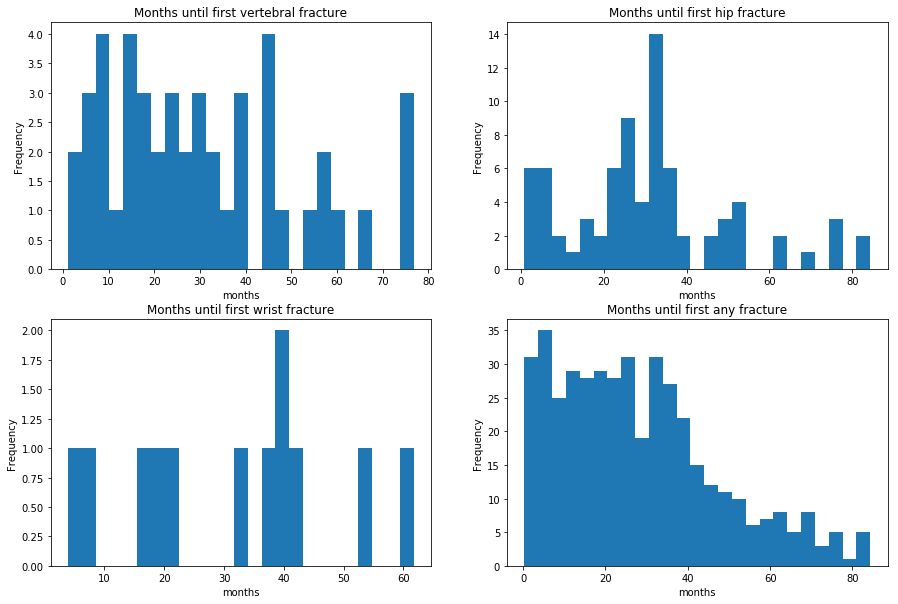

In [17]:
_, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, fx in enumerate(FX_TYPES):
    df_fractures[df_fractures[f"{fx}_fx_tte"].notna()][f"{fx}_fx_tte"].plot(kind="hist", bins=25, ax=axs[i//2][i%2])
    axs[i//2][i%2].set_xlabel("months")
    axs[i//2][i%2].set_title(f"Months until first {fx} fracture")

In [20]:
# Read death dates from different dataframe
death_dates = pd.read_csv("/mnt/project/death_date_death.csv", parse_dates=["date_of_death"]).drop("dnx_death_id", axis=1)
death_dates.rename(columns={"eid": "patientId"}, inplace=True)
death_dates

,patientId,date_of_death
0,4377489,2020-12-04
1,1010538,2020-07-11
2,1495839,2020-12-30
3,4036088,2018-01-03
4,1970431,2021-08-22
...,...,...
213,1128365,2021-04-18
214,1232406,2020-08-14
215,3354911,2019-04-20
216,3356919,2021-07-04


In [24]:
# Add death date information to main dataframe
pm_women_expanded = pm_women_expanded.set_index("patientId").join(death_dates.set_index("patientId"), how="left").reset_index()
pm_women_expanded["date_of_death"].notna().sum()

181

In [26]:
# Find last follow up date (they are going to be used for right censoring)
dates = pm_women_expanded.loc[:,"p41280_a0":"p41280_a118"].fillna(pd.NaT)
pm_women_expanded["last_follow_up"] = dates.apply(lambda x: x.sort_values(ascending=False)[0], axis=1)
pm_women_expanded = pm_women_expanded.dropna(subset=["last_follow_up"]).reset_index(drop=True)
pm_women_expanded["last_follow_up"]

0       2000-11-29
1       2000-11-06
2       2007-01-10
3       2018-10-16
4       2012-11-10
           ...    
19954   2020-08-03
19955   2021-02-14
19956   2017-07-26
19957   2018-07-02
19958   2013-10-09
Name: last_follow_up, Length: 19959, dtype: datetime64[ns]

In [52]:
def add_censored_data_to_df(df, fx_type):
    # Create an empty pandas series to store the censor information for each row
    censoring = pd.Series(index=df.index)
    
    for idx, row in df.iterrows():
        visit_date = row["date_i2"]
        fx_date = row[f"{fx_type}_fx"]
        last_date = pd.to_datetime(row[["last_follow_up", "date_of_death"]]).max()
        
        if pd.notnull(fx_date):
            censoring[idx] = False
            continue
        
        elif pd.isnull(fx_date) and last_date > visit_date:
            df.loc[idx, f"{fx_type}_fx_tte"] = np.round(((last_date - visit_date)/np.timedelta64(1, 'M')), 4)
            censoring[idx] = True
            
    return censoring

In [53]:
for fx in FX_TYPES:
    pm_women_expanded[f"{fx}_right_censored"] = add_censored_data_to_df(pm_women_expanded, fx)
fx_columns = pm_women_expanded.loc[:, "vertebral_fx":].columns.tolist()
df_fractures = pm_women_expanded.loc[:, ["patientId", "date_i2", "age_i2"] + fx_columns]
df_fractures = df_fractures.dropna(subset=["any_right_censored"]).reset_index(drop=True)
df_fractures

,patientId,date_i2,age_i2,vertebral_fx,vertebral_fx_date,vertebral_fx_tte,hip_fx,hip_fx_date,hip_fx_tte,wrist_fx,wrist_fx_date,wrist_fx_tte,any_fx,any_fx_date,any_fx_tte,date_of_death,last_follow_up,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored
0,1001554,2018-03-22,67,NaT,NaT,6.8338,NaT,NaT,6.8338,NaT,NaT,6.8338,NaT,NaT,6.8338,NaT,2018-10-16,True,True,True,True
1,1003176,2019-03-02,57,NaT,NaT,22.7684,NaT,NaT,22.7684,NaT,NaT,22.7684,NaT,NaT,22.7684,NaT,2021-01-23,True,True,True,True
2,1004439,2019-01-27,62,NaT,NaT,22.3413,NaT,NaT,22.3413,NaT,NaT,22.3413,NaT,NaT,22.3413,NaT,2020-12-07,True,True,True,True
3,1005492,2016-06-13,58,NaT,NaT,62.3257,NaT,NaT,62.3257,NaT,NaT,62.3257,NaT,NaT,62.3257,NaT,2021-08-23,True,True,True,True
4,1006076,2018-09-18,69,NaT,NaT,34.3334,NaT,NaT,34.3334,NaT,NaT,34.3334,NaT,NaT,34.3334,NaT,2021-07-29,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,6020460,2015-12-02,64,NaT,NaT,7.0967,NaT,NaT,7.0967,NaT,NaT,7.0967,NaT,NaT,7.0967,NaT,2016-07-05,True,True,True,True
8230,6020935,2017-10-17,69,NaT,NaT,28.3538,NaT,NaT,28.3538,NaT,NaT,28.3538,NaT,NaT,28.3538,NaT,2020-02-27,True,True,True,True
8231,6023119,2015-10-02,57,NaT,NaT,45.6026,NaT,NaT,45.6026,NaT,NaT,45.6026,NaT,NaT,45.6026,NaT,2019-07-21,True,True,True,True
8232,6023313,2014-11-20,72,NaT,NaT,68.4367,NaT,NaT,68.4367,NaT,NaT,68.4367,NaT,NaT,68.4367,NaT,2020-08-03,True,True,True,True


In [54]:
[print(df_fractures[col].value_counts()) for col in df_fractures.loc[:,"vertebral_right_censored":].columns]

True     8188
False      46
Name: vertebral_right_censored, dtype: int64
True     8156
False      78
Name: hip_right_censored, dtype: int64
True     8222
False      12
Name: wrist_right_censored, dtype: int64
True     7803
False     431
Name: any_right_censored, dtype: int64


[None, None, None, None]

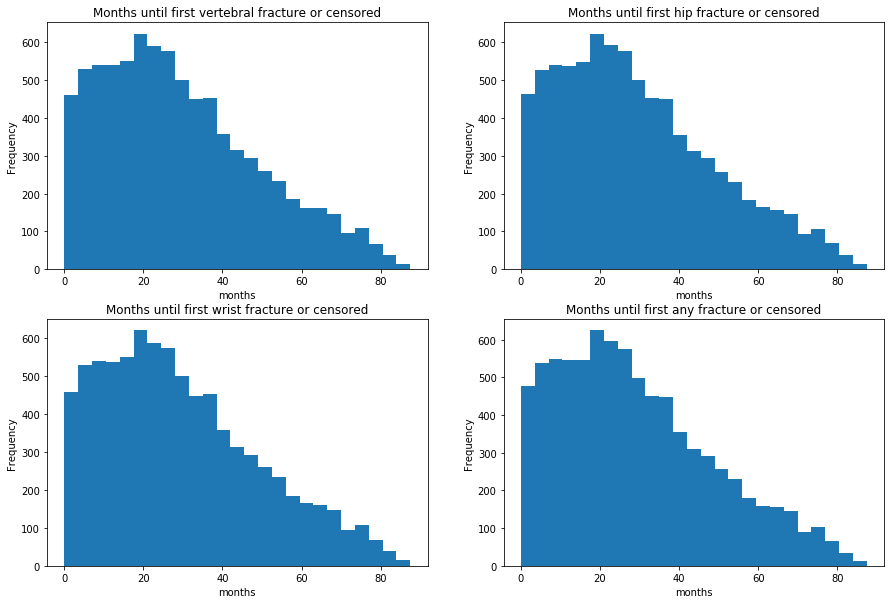

In [56]:
_, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, fx in enumerate(FX_TYPES):
    df_fractures[df_fractures[f"{fx}_fx_tte"].notna()][f"{fx}_fx_tte"].plot(kind="hist", bins=25, ax=axs[i//2][i%2])
    axs[i//2][i%2].set_xlabel("months")
    axs[i//2][i%2].set_title(f"Months until first {fx} fracture or censored")

In [57]:
df_fractures_final = df_fractures[["patientId", "date_i2", "age_i2", "vertebral_fx_tte", "hip_fx_tte", "wrist_fx_tte", "any_fx_tte", "vertebral_right_censored", "hip_right_censored", "wrist_right_censored", "any_right_censored"]]
df_fractures_final

,patientId,date_i2,age_i2,vertebral_fx_tte,hip_fx_tte,wrist_fx_tte,any_fx_tte,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored
0,1001554,2018-03-22,67,6.8338,6.8338,6.8338,6.8338,True,True,True,True
1,1003176,2019-03-02,57,22.7684,22.7684,22.7684,22.7684,True,True,True,True
2,1004439,2019-01-27,62,22.3413,22.3413,22.3413,22.3413,True,True,True,True
3,1005492,2016-06-13,58,62.3257,62.3257,62.3257,62.3257,True,True,True,True
4,1006076,2018-09-18,69,34.3334,34.3334,34.3334,34.3334,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
8229,6020460,2015-12-02,64,7.0967,7.0967,7.0967,7.0967,True,True,True,True
8230,6020935,2017-10-17,69,28.3538,28.3538,28.3538,28.3538,True,True,True,True
8231,6023119,2015-10-02,57,45.6026,45.6026,45.6026,45.6026,True,True,True,True
8232,6023313,2014-11-20,72,68.4367,68.4367,68.4367,68.4367,True,True,True,True


In [58]:
# Renaming columns
df_fractures_final = df_fractures_final.rename(columns={
    "date_i2": "date",
    "age_i2": "age",
    "vertebral_fx_tte": "vertebral_fx", 
    "hip_fx_tte": "hip_fx", 
    "wrist_fx_tte": "wrist_fx", 
    "any_fx_tte": "any_fx",
})
df_fractures_final

,patientId,date,age,vertebral_fx,hip_fx,wrist_fx,any_fx,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored
0,1001554,2018-03-22,67,6.8338,6.8338,6.8338,6.8338,True,True,True,True
1,1003176,2019-03-02,57,22.7684,22.7684,22.7684,22.7684,True,True,True,True
2,1004439,2019-01-27,62,22.3413,22.3413,22.3413,22.3413,True,True,True,True
3,1005492,2016-06-13,58,62.3257,62.3257,62.3257,62.3257,True,True,True,True
4,1006076,2018-09-18,69,34.3334,34.3334,34.3334,34.3334,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
8229,6020460,2015-12-02,64,7.0967,7.0967,7.0967,7.0967,True,True,True,True
8230,6020935,2017-10-17,69,28.3538,28.3538,28.3538,28.3538,True,True,True,True
8231,6023119,2015-10-02,57,45.6026,45.6026,45.6026,45.6026,True,True,True,True
8232,6023313,2014-11-20,72,68.4367,68.4367,68.4367,68.4367,True,True,True,True


In [59]:
df_fractures_final.isna().sum()

patientId                   0
date                        0
age                         0
vertebral_fx                0
hip_fx                      0
wrist_fx                    0
any_fx                      0
vertebral_right_censored    0
hip_right_censored          0
wrist_right_censored        0
any_right_censored          0
dtype: int64

In [60]:
df_fractures_final.to_csv("fractures.csv", index=False)

In [61]:
%%bash
dx upload fractures.csv --path /data/processed/

ID                          file-GPbjXX8Jjxx7V51JPQjBvZjY
Class                       file
Project                     project-GP77K38Jjxx9XzFP2KzPQyfG
Folder                      /data/processed
Name                        fractures.csv
State                       closing
Visibility                  visible
Types                       -
Properties                  -
Tags                        -
Outgoing links              -
Created                     Tue Feb 14 13:14:49 2023
Created by                  ollehman
 via the job                job-GPbj240JjxxPbKYGP41qVbfZ
Last modified               Tue Feb 14 13:14:51 2023
Media type                  
archivalState               "live"
cloudAccount                "cloudaccount-dnanexus"


### Merge with densitometry dataset

In [69]:
densitometry_data = pd.read_csv("/mnt/project/data/processed/densitometry.csv", parse_dates=["date_i2"]).drop("age_i2", axis=1)
densitometry_data = densitometry_data.rename(columns={"date_i2": "date"})
densitometry_data

,patientId,date,height_i2,weight_i2,body_mass_index_i2,tbs_ls,tscore_ls,tscore_neck,tscore_totalHip
0,1000344,2015-02-23,154.0,48.3,20.6331,1.200,-0.719586,-0.863189,-0.928921
1,1000898,2018-11-07,168.0,85.9,31.1729,1.095,-0.309509,-0.845577,-0.813459
2,1000946,2018-02-12,165.0,84.9,31.1846,1.070,0.548010,-0.246668,0.219435
3,1001554,2018-03-22,153.0,56.7,24.2215,1.017,-2.730180,-0.617614,-0.995070
4,1001643,2015-08-04,176.0,63.9,20.6289,1.125,-0.986464,-2.195810,-2.392520
...,...,...,...,...,...,...,...,...,...
11698,6020460,2015-12-02,171.0,69.8,24.7307,1.170,-1.600300,-1.628120,-1.953780
11699,6020702,2015-09-17,160.0,74.1,28.9453,1.052,-2.588480,-1.163530,-1.465380
11700,6022316,2017-09-19,170.0,77.5,27.4589,1.237,0.424648,-0.708455,-0.463218
11701,6023119,2015-10-02,161.0,62.7,23.8912,1.294,1.472440,0.914185,1.294470


In [70]:
# join the two tables
merged_table = df_fractures_final.set_index(["patientId", "date"]).join(densitometry_data.set_index(["patientId", "date"]), how="left").reset_index()
merged_table

,patientId,date,age,vertebral_fx,hip_fx,wrist_fx,any_fx,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,height_i2,weight_i2,body_mass_index_i2,tbs_ls,tscore_ls,tscore_neck,tscore_totalHip
0,1001554,2018-03-22,67,6.8338,6.8338,6.8338,6.8338,True,True,True,True,153.0,56.7,24.2215,1.017,-2.730180,-0.617614,-0.995070
1,1003176,2019-03-02,57,22.7684,22.7684,22.7684,22.7684,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004439,2019-01-27,62,22.3413,22.3413,22.3413,22.3413,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1005492,2016-06-13,58,62.3257,62.3257,62.3257,62.3257,True,True,True,True,164.0,100.1,36.3260,1.199,2.043910,0.874155,0.755662
4,1006076,2018-09-18,69,34.3334,34.3334,34.3334,34.3334,True,True,True,True,161.0,57.7,22.9677,1.089,-0.480305,-0.410832,-0.063631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,6020460,2015-12-02,64,7.0967,7.0967,7.0967,7.0967,True,True,True,True,171.0,69.8,24.7307,1.170,-1.600300,-1.628120,-1.953780
8230,6020935,2017-10-17,69,28.3538,28.3538,28.3538,28.3538,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8231,6023119,2015-10-02,57,45.6026,45.6026,45.6026,45.6026,True,True,True,True,161.0,62.7,23.8912,1.294,1.472440,0.914185,1.294470
8232,6023313,2014-11-20,72,68.4367,68.4367,68.4367,68.4367,True,True,True,True,159.0,69.3,28.1147,1.099,-0.681709,-1.592420,-1.844660


In [71]:
merged_table.isna().sum()

patientId                      0
date                           0
age                            0
vertebral_fx                   0
hip_fx                         0
wrist_fx                       0
any_fx                         0
vertebral_right_censored       0
hip_right_censored             0
wrist_right_censored           0
any_right_censored             0
height_i2                   2828
weight_i2                   2922
body_mass_index_i2          2922
tbs_ls                      2828
tscore_ls                   2828
tscore_neck                 2828
tscore_totalHip             2828
dtype: int64

In [72]:
merged_table = merged_table.dropna(subset=["tscore_totalHip"])
[print(merged_table[col].value_counts()) for col in merged_table.loc[:,"vertebral_right_censored":"any_right_censored"].columns]

True     5376
False      30
Name: vertebral_right_censored, dtype: int64
True     5348
False      58
Name: hip_right_censored, dtype: int64
True     5398
False       8
Name: wrist_right_censored, dtype: int64
True     5118
False     288
Name: any_right_censored, dtype: int64


[None, None, None, None]

### Look for multiple fractures 

In [2]:
df_fractures = pd.read_csv("/mnt/project/data/processed/fractures.csv")
df_fractures

,patientId,date,age,vertebral_fx,hip_fx,wrist_fx,any_fx,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored
0,1001554,2018-03-22,67,6.8338,6.8338,6.8338,6.8338,True,True,True,True
1,1003176,2019-03-02,57,22.7684,22.7684,22.7684,22.7684,True,True,True,True
2,1004439,2019-01-27,62,22.3413,22.3413,22.3413,22.3413,True,True,True,True
3,1005492,2016-06-13,58,62.3257,62.3257,62.3257,62.3257,True,True,True,True
4,1006076,2018-09-18,69,34.3334,34.3334,34.3334,34.3334,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
8217,6020460,2015-12-02,64,7.0967,7.0967,7.0967,7.0967,True,True,True,True
8218,6020935,2017-10-17,69,28.3538,28.3538,28.3538,28.3538,True,True,True,True
8219,6023119,2015-10-02,57,45.6026,45.6026,45.6026,45.6026,True,True,True,True
8220,6023313,2014-11-20,72,68.4367,68.4367,68.4367,68.4367,True,True,True,True
